## Load and Inspect the Data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

file_path = '../preprocessed_winemag-data copy.csv'  
df = pd.read_csv(file_path)

df.head()

,id,country,description,designation,points,price,province,title,variety,winery
0,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
1,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
2,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
3,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
4,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo


<Axes: xlabel='winery'>

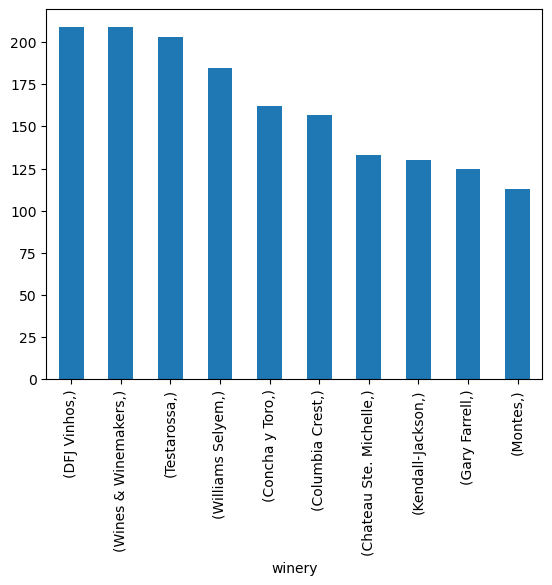

In [6]:
df[['winery']].value_counts().head(10).plot(kind='bar')

In [16]:
filtered_df = df[['country', 'points', 'price', 'province']]
filtered_df.head()

,country,points,price,province
0,Portugal,87,15.0,Douro
1,US,87,13.0,Michigan
2,US,87,65.0,Oregon
3,Spain,87,15.0,Northern Spain
4,Italy,87,16.0,Sicily & Sardinia


In [127]:
grouped = df.groupby('province').agg(
    average_points=('points', 'mean'),  # Average points per province
    average_price=('price', 'mean'),    # Average price per province
    country=('country', 'first'),       # Country (assuming each province belongs to one country)
    num_wines=('province', 'size')      # Number of wines in the province
)

# Reset index to make 'province' a column again
grouped.reset_index(inplace=True)

# Reorder the columns
grouped = grouped[['province', 'average_points', 'average_price', 'country', 'num_wines']]

grouped = grouped[grouped['num_wines'] > 20]
grouped = grouped[grouped['average_price'] < 100]
grouped = grouped[grouped['average_price'] > 10]


grouped['log_num_wines'] = np.log2(grouped['num_wines']/4)

# Rename Columns
grouped.columns = ['Province', 'Average Points', 'Average Price', 'Country', 'Number of Wines', 'Log Number of Wines']

grouped.to_csv('province_info.csv', index=False)

display(grouped.head())

,Province,Average Points,Average Price,Country,Number of Wines,Log Number of Wines
2,Aconcagua Valley,88.129412,44.905882,Chile,85,4.409391
3,Aegean,89.095238,29.285714,Turkey,21,2.392317
7,Alentejano,88.036011,21.343490,Portugal,722,7.495855
8,Alentejo,88.647799,26.710692,Portugal,159,5.312883
11,Alsace,89.943987,32.315761,France,1821,8.830515


In [128]:
print(f'min: {grouped["Log Number of Wines"].min():.2f} -- max: {grouped["Log Number of Wines"].max():.2f}')

min: 2.39 -- max: 12.57


In [129]:
np.log(24266.00)

10.096831472611818

In [130]:
print(f'min: {grouped["Number of Wines"].min():.2f} -- max: {grouped["Number of Wines"].max():.2f}')

min: 21.00 -- max: 24266.00
